# Lab-8.3.1_Fitting_classification_trees

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

# for viewing graphs
from IPython.display import HTML

In [2]:
carseats = pd.read_csv(r'./data/Carseats.csv')
data = carseats.copy() # i am used to treat data as "data"
print(carseats.shape)
carseats.head()

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Before going furthur, according to me its a good advice to get familier with the data. The current data we have is of an organization who sells car seats (this is my take on the dataset), each row represents a region. Therefore for each region, the columns are - 
- Sales: unit sales in thousands
- CompPrice: price charged by competitor at each location
- Income: community income level in 1000s of dollars
- Advertising: local ad budget at each location in 1000s of dollars
- Population: regional pop in thousands
- Price: price for car seats at each site
- ShelveLoc: Bad, Good or Medium indicates quality of shelving location
- Age: age level of the population
- Education: ed level at location
- Urban: Yes/No
- US: Yes/No

Looking at the above data we can get some idea what job we have in our hands, so the company wants to set up a busniess in some new region, we have the information of that region and want to predict what the sales would be..To make the model we will use this data as training data
source - http://rstudio-pubs-static.s3.amazonaws.com/244643_520e0851a0f74d9fb588c8aaad481e21.html#:~:text=The%20Carseats%20data%20set%20tracks,different%20store)%20and%2011%20variables%3A&text=Price%3A%20price%20for%20car%20seats,indicates%20quality%20of%20shelving%20location

### Encoding the categorical variables

In [3]:
print(data['ShelveLoc'].unique())
print(data['Urban'].unique())
print(data['US'].unique())

['Bad' 'Good' 'Medium']
['Yes' 'No']
['Yes' 'No']


In [4]:
# as the labels are ordinal, we would only be using label encoder, and since the values are small in number, we will map them
yes_no_dict = {'Yes':1,'No':0}
data['Urban'] = data['Urban'].map(yes_no_dict)
data['US'] = data['US'].map(yes_no_dict)
data['ShelveLoc'] = data['ShelveLoc'].map({'Bad':0,'Good':1,'Medium':3})

In [5]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

In [6]:
# adding a binary target variable
data['Sales_binary'] = np.where(data['Sales']<=9,0,1)

In [7]:
# splitting X and y
X = data.drop(['Sales','Sales_binary'],axis = 1)
y = data['Sales_binary']

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [8]:
clf = DecisionTreeClassifier(max_depth=6) 
# earlier i fitted it without giving the max depth paramter, and the fitted tree was having depth = 10, which is a high number
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6)

Plotting tree - https://mljar.com/blog/visualize-decision-tree/

In [10]:
#plotting tree
import graphviz 
import os
# https://graphviz.org/download/ --> goto install Graphviz for your Operating System(OS), 
# not only ' pip install graphviz ' graphviz for python package.
os.environ["PATH"] += os.pathsep + "D:/miniconda/Graphviz/bin/"
# I faced a problem that i was not able to import it even after installing, to solve this issue 
# first run "conda install graphviz" and then "conda install python-graphviz"

# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['0','1'], filled=True)

# Draw graph
graph = graphviz.Source(dot_data) 
display(HTML(graph._repr_svg_()))

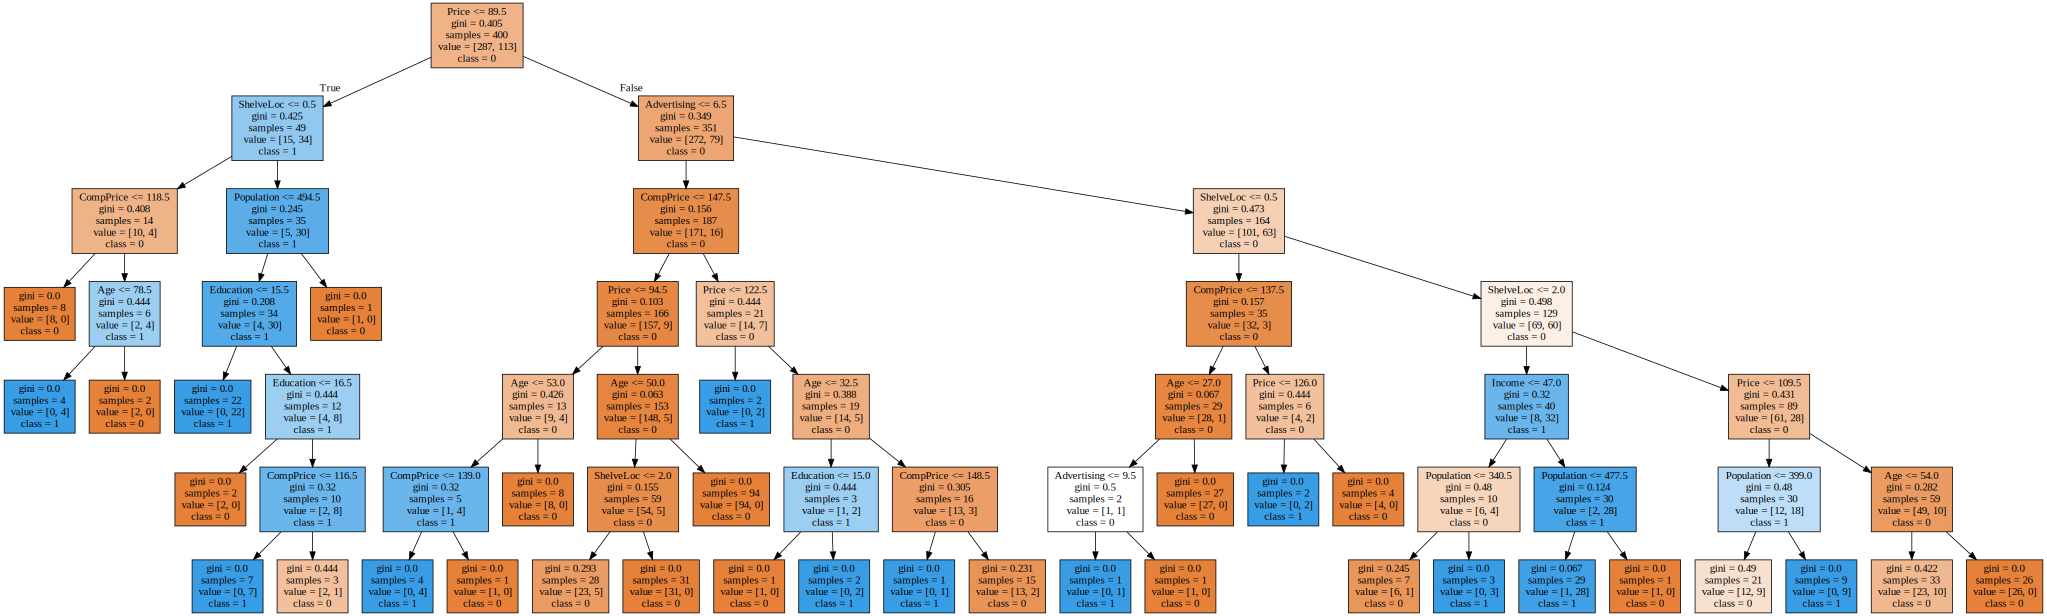

In [11]:
# to make the above graph more readable, we can use -
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['0','1'], filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

What we can get from the above tree is that the most important crietrion is the price feature. if the price is less than or equal to 89.5, we look at shelving condition, else we look at advertising cost..

## Finding the test error

In [12]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(['Sales','Sales_binary'],axis = 1),data['Sales_binary'],test_size = 0.5,random_state = 1)

In [13]:
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,y_train)
print('Training accuracy ',clf.score(X_train,y_train))
print('Test Accuracy ',clf.score(X_test,y_test))

Training accuracy  0.94
Test Accuracy  0.695


In [14]:
cm = confusion_matrix(y_test,clf.predict(X_test))
cm

array([[121,  25],
       [ 36,  18]], dtype=int64)

# cross validating for optimal size (just as we are doing pruing in the book)

In [16]:
scores_dict = {}
for max_depth in np.arange(2,15):
  clf = DecisionTreeClassifier(max_depth = max_depth)
  scores_dict[max_depth] = np.mean(cross_val_score(clf,X,y,cv = 10))

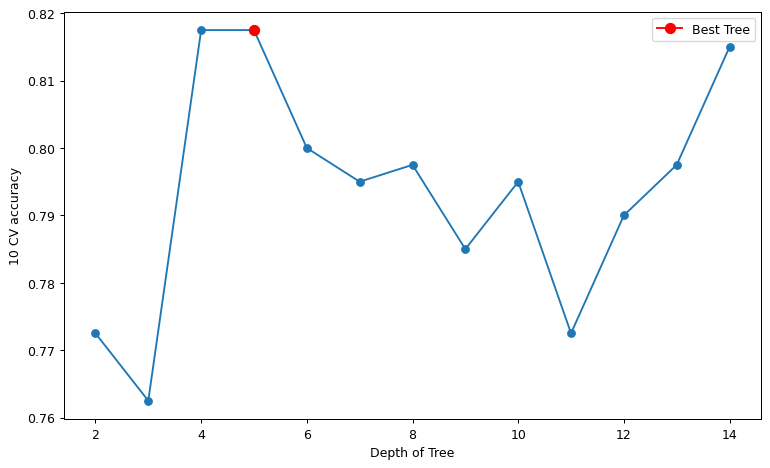

In [18]:
plt.figure(figsize = (10,6), dpi=90)
plt.plot(list(scores_dict.keys()),list(scores_dict.values()),marker ='o')
plt.plot(max(scores_dict, key=scores_dict.get),max(list(scores_dict.values())),marker = 'o',markersize = 8,color = 'r',label = 'Best Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('10 CV accuracy')
plt.legend()

# Happy Learning :)